In [ ]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

%pip install seaborn
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# Telco Customer Churn Project

In this notebook, we will explore multiple factors affecting customer churn, such as contract type, payment method, monthly charges, and various additional services like online security or tech support. Our goal is to understand which features influence a customer’s decision to leave (churn) and to build predictive models around it.

## About the Dataset

### Description
The Telco Customer Churn dataset is designed to examine the factors that influence whether a customer stays with or leaves a telecommunications company. The dataset contains **7,043 records**, each representing a unique customer. It includes demographic details, subscription information, and billing data.

### Variables
- **CustomerID:** A unique identifier for each customer.
- **Gender:** The customer’s gender (Male or Female).
- **Senior Citizen:** Indicates if the customer is 65 or older (Yes/No).
- **Partner:** Whether the customer has a partner (Yes/No).
- **Dependents:** Whether the customer has dependents (Yes/No).
- **Tenure Months:** The total number of months the customer has been with the company.
- **Phone Service:** Indicates if the customer has a home phone service (Yes/No).
- **Multiple Lines:** Whether the customer has multiple telephone lines (Yes/No).
- **Internet Service:** The type of internet service subscribed to (No, DSL, Fiber Optic, Cable).
- **Online Security:** Subscription to additional online security services (Yes/No).
- **Online Backup:** Subscription to additional online backup services (Yes/No).
- **Device Protection:** Subscription to a device protection plan (Yes/No).
- **Tech Support:** Subscription to technical support with reduced wait times (Yes/No).
- **Streaming TV:** Whether the customer streams TV content (Yes/No).
- **Streaming Movies:** Whether the customer streams movies (Yes/No).
- **Contract:** The contract type (Month-to-Month, One Year, Two Year).
- **Paperless Billing:** Whether the customer uses paperless billing (Yes/No).
- **Payment Method:** How the customer pays their bill (Bank Withdrawal, Credit Card, Mailed Check).
- **Monthly Charge:** The current monthly charge for the customer’s services.
- **Total Charges:** The total charges incurred up to the specified quarter.
- **Churn Label:** Indicates if the customer left the company this quarter (Yes/No).
- **Churn Reason (if available):** The reason provided by the customer for leaving the company.
- **Other Demographic/Geolocation Columns:** (e.g., Country, State, City, Zip Code, etc.) that provide additional context about the customer’s location.



### Target Variable
- **Churn Value:**  
  - **1** if the customer left the company (churned) this quarter,  
  - **0** if the customer stayed.

This numeric churn indicator is directly related to the **Churn Label** column (Yes/No). Higher churn values (i.e., **1**) indicate customers who are no longer with the company.

In the following sections of this notebook, we will perform data cleaning, exploratory data analysis (EDA), feature engineering, and build various classification models to predict whether a customer will churn. We will then compare model performances and draw conclusions on the key drivers of churn.


## Loading the Data

In [5]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [7]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000,100.000000,6500.000000


## Data Preparation

### 1. Finding Unique Values  
We begin by iterating over each column in the dataset to print out its unique values. This step helps us understand the diversity of data in each column and identify any fields that might have only one unique value, which would render them uninformative for predictive modeling. By reviewing these unique values, we gain insights into which columns may need further cleaning or transformation.



In [8]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'CustomerID': ['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']
Unique values in column 'Count': [1]
Unique values in column 'Country': ['United States']
Unique values in column 'State': ['California']
Unique values in column 'City': ['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']
Unique values in column 'Zip Code': [90003 90005 90006 ... 96128 96134 96146]
Unique values in column 'Lat Long': ['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']
Unique values in column 'Latitude': [33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]
Unique values in column 'Longitude': [-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]
Unique values in column 'Gender': ['Male' 'Female']
Unique values in column 'Senior Citizen': ['No' 'Yes']
Unique values in 

### 2. Dropping Non-Informative Columns  
After examining the unique values, we remove columns that are either identifiers or do not contribute meaningful information to our analysis. For instance, columns such as `CustomerID`, `Count`, `Country`, `State`, and `Churn Label` are dropped because they either serve solely as labels or contain redundant information. This simplification of the dataset ensures that our analysis focuses on the most relevant features.


In [9]:
df = df.drop(['CustomerID', 'Count', 'Country', 'State','Churn Label'], axis=1)

### 3. Encoding Categorical Variables  
To prepare the dataset for machine learning algorithms, we convert categorical text data into numerical format using a `LabelEncoder`. In this step, all selected categorical columns (such as `Gender`, `City`, `Senior Citizen`, and others) are transformed into integer labels. This conversion is essential because most models require numerical input, and encoding these variables makes the dataset consistent and suitable for further processing.



In [11]:
categorical_columns = ['Gender','City', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
                       'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
                       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
                       'Contract', 'Paperless Billing', 'Payment Method',
                       'Churn Reason']

label_encoder = LabelEncoder()

for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


### 4. Converting 'Total Charges' to a Numeric Format  
The `Total Charges` column may initially be stored as a string (object) due to formatting issues such as leading or trailing spaces. To correct this, we first strip any extra whitespace and then convert the column to a numeric type using `pd.to_numeric()`, which coerces any problematic entries into `NaN`. This conversion is vital for enabling numerical calculations and statistical analysis on the `Total Charges` data.




In [12]:
df['Total Charges'] = df['Total Charges'].astype(str).str.strip()
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

### 5. Handling Missing Values in 'Total Charges'  
Once `Total Charges` has been converted to a numeric format, any values that could not be converted (resulting in `NaN`) are replaced with the mean value of the column. By imputing missing values in this manner, we ensure that the dataset remains complete and that the feature is free of gaps, which could otherwise disrupt model training and evaluation.




In [14]:
mean_value = df['Total Charges'].mean()
df['Total Charges'].fillna(mean_value, inplace=True)

### 6. Splitting the 'Lat Long' Column  
The `Lat Long` column contains geographic coordinates as a single string formatted as "latitude, longitude". To facilitate more granular geographic analysis, we split this column into two separate columns: `Latitude` and `Longitude`. This is achieved using the `str.split()` method with a comma as the delimiter, and the results are expanded into new columns. After splitting, we convert both new columns to the `float64` data type so they can be used in numerical computations. Finally, we drop the original `Lat Long` column, as it is no longer necessary.

In [15]:
df[['Latitude', 'Longitude']] = df['Lat Long'].str.split(',', expand=True)


df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)

df = df.drop('Lat Long', axis=1)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   City               7043 non-null   int64  
 1   Zip Code           7043 non-null   int64  
 2   Latitude           7043 non-null   float64
 3   Longitude          7043 non-null   float64
 4   Gender             7043 non-null   int64  
 5   Senior Citizen     7043 non-null   int64  
 6   Partner            7043 non-null   int64  
 7   Dependents         7043 non-null   int64  
 8   Tenure Months      7043 non-null   int64  
 9   Phone Service      7043 non-null   int64  
 10  Multiple Lines     7043 non-null   int64  
 11  Internet Service   7043 non-null   int64  
 12  Online Security    7043 non-null   int64  
 13  Online Backup      7043 non-null   int64  
 14  Device Protection  7043 non-null   int64  
 15  Tech Support       7043 non-null   int64  
 16  Streaming TV       7043 

## Visualizing the Data

In this step, we generate a correlation heatmap to visually inspect the relationships among the various features in our dataset. We begin by computing the correlation matrix using `df.corr()`, which calculates the Pearson correlation coefficients between pairs of numerical variables. We then create a heatmap using Seaborn's `heatmap()` function, specifying a figure size of (15, 10) to ensure that the annotations are clearly visible. The `annot=True` parameter places the correlation values directly on the heatmap, formatted to two decimal places with `fmt='.2f'`, and a line width of 0.5 is added to separate the cells. The chosen `coolwarm` colormap helps distinguish positive correlations from negative ones.

From this heatmap, we observe strong positive correlations among several features such as churn score, monthly charges, payment methods, paperless billing, senior citizen, multiple lines, and phone service. Conversely, there are notable negative correlations with features like churn reason, total charges, contract, and tenure months. These relationships provide valuable insights into the key factors that might influence customer churn.


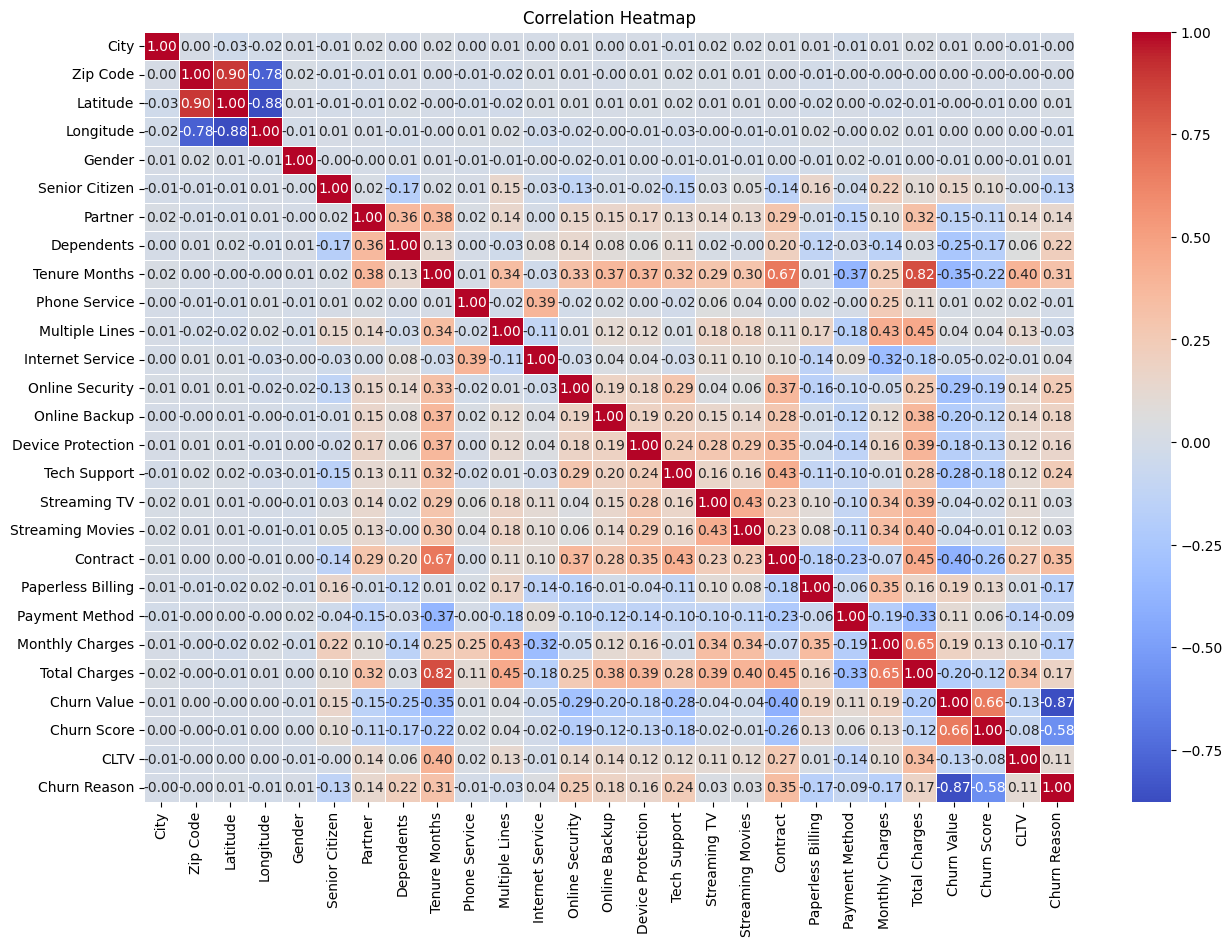

In [16]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Train-Test Split, SMOTE, and Normalization

### 1. Train-Test Split
First, we separate the features from the target variable. In this case, the target variable is **Churn Value** and all other columns serve as predictors. We use scikit-learn's `train_test_split` function to divide the data into training and testing sets. We specify a test size of 30% to reserve a portion of the data for evaluating our model later. The `stratify=y` parameter ensures that both the training and test sets maintain the same class distribution as the original dataset. This step is essential for obtaining a reliable evaluation on unseen data.

In [17]:
X = df.drop(columns=['Churn Value'])  # Features
y = df['Churn Value']  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### 2. Applying SMOTE
After splitting the data, we address any class imbalance in the training set by applying SMOTE (Synthetic Minority Over-sampling Technique). SMOTE generates synthetic samples for the minority class (in this context, the class with fewer samples) to create a more balanced dataset. We set the sampling strategy to `'minority'` to increase only the minority class. Once applied, we print the class distribution before and after SMOTE to verify that the minority class has been sufficiently augmented. This balancing helps improve the robustness of the subsequent predictive models.


In [18]:
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Checking the class distribution before and after SMOTE
print("Original class distribution:\n", y_train.value_counts())
print("Resampled class distribution:\n", pd.Series(y_train_resampled).value_counts())

Original class distribution:
 Churn Value
0    3622
1    1308
Name: count, dtype: int64
Resampled class distribution:
 Churn Value
0    3622
1    3622
Name: count, dtype: int64


### 3. Normalization
With the training data balanced, the next step is to normalize the features. We use the `StandardScaler` from scikit-learn to standardize the features by removing the mean and scaling them to unit variance. This normalization process is critical as it ensures that all features are on a similar scale, which can significantly improve the performance and convergence speed of many machine learning algorithms. We fit the scaler on the resampled training data and then transform both the training and test sets, maintaining consistency across our data.

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

# Verify the scaled shapes
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)


Scaled training data shape: (7244, 26)
Scaled test data shape: (2113, 26)


## Optimization using SelectKbest

### 1. Feature Selection and Hyperparameter Tuning with GridSearchCV  
In this first step, we build a pipeline that integrates feature selection and classification. We use `SelectKBest` with the ANOVA F-test (`f_classif`) to automatically select the most informative features, and combine it with a Logistic Regression classifier. By defining a parameter grid that tunes the number of features (`selectkbest__k`) and the regularization strength (`clf__C`) of Logistic Regression, we then perform a grid search with 5-fold cross-validation using `GridSearchCV`. This systematic search allows us to find the best hyperparameters and the optimal set of features for our model.

In [20]:
# Creating a pipeline
pipeline = Pipeline([
    ('selectkbest', SelectKBest(score_func=f_classif)),  # Changed to f_classif
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])

# Define the parameter grid for GridSearchCV:
param_grid = {
    'selectkbest__k': [5, 10, 15, 20],
    'clf__C': [0.01, 0.1, 1, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on your scaled, resampled training data
grid_search.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and the best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'clf__C': 10, 'selectkbest__k': 5}
Best cross-validation score: 0.9975155279503106


### 2. Extracting and Printing the Selected Features

In [21]:
import pandas as pd

feature_names = X_train.columns

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)

selected_features = feature_names[grid_search.best_estimator_.named_steps['selectkbest'].get_support()]
print("Selected Features:", selected_features.tolist())


Selected Features: ['Tenure Months', 'Online Security', 'Contract', 'Churn Score', 'Churn Reason']


### 3. Evaluating the Best Model on the Test Data
After optimizing the model with GridSearchCV, we use the best estimator to make predictions on the test set. We evaluate its performance by calculating the test accuracy, generating a classification report, and constructing a confusion matrix. This evaluation helps us determine whether the model generalizes well or if it is overfitting the training data.

In [22]:
# Use the best model from GridSearchCV to make predictions
final_model = grid_search.best_estimator_
y_test_pred = final_model.predict(X_test_scaled)

# Evaluate the model's performance on the test set
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report:\n", classification_report(y_test, y_test_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_test_pred))


Test Accuracy: 0.9981069569332702

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      0.99      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113


Confusion Matrix:
 [[1552    0]
 [   4  557]]


### 4. Comparing Multiple Models Using Different Algorithms
To further validate our feature selection process, we compare several classifiers—such as K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting, and XGBoost—using a similar pipeline. For each model, we use SelectKBest (with a fixed number of features, e.g., the best k found previously) followed by the classifier. We perform 5-fold cross-validation on the training set to obtain performance scores, and then evaluate each model on the test set. This step-by-step comparison helps us identify which algorithm performs best with our selected feature set, and provides insights into the robustness of our modeling approach.

In [23]:
# Models to compare
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

best_k = 5


for name, model in models.items():
    print(f"--- Model: {name} ---")

    # Create a pipeline that first selects k best features and then fits the model
    pipeline_model = Pipeline([
        ('selectkbest', SelectKBest(score_func=f_classif, k=best_k)),
        ('clf', model)
    ])

    # Fit the model on the scaled, SMOTE-resampled training data
    pipeline_model.fit(X_train_scaled, y_train_resampled)

    # Perform 5-fold cross-validation on the training set
    cv_scores = cross_val_score(pipeline_model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("Cross-validation scores:", np.round(cv_scores, 4))
    print("Mean CV score:", np.round(cv_scores.mean(), 4))

    # Predict on the scaled test data
    y_test_pred = pipeline_model.predict(X_test_scaled)

    # Compute the test set accuracy
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", np.round(test_acc, 4))

    # Generate the classification report
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

    # Generate the confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("\n" + "="*60 + "\n")

--- Model: KNN ---
Cross-validation scores: [0.9821 0.9876 0.9972 1.     0.9959]
Mean CV score: 0.9925
Test Accuracy: 0.9934

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1552
           1       1.00      0.98      0.99       561

    accuracy                           0.99      2113
   macro avg       1.00      0.99      0.99      2113
weighted avg       0.99      0.99      0.99      2113

Confusion Matrix:
 [[1552    0]
 [  14  547]]


--- Model: Decision Tree ---
Cross-validation scores: [1. 1. 1. 1. 1.]
Mean CV score: 1.0
Test Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1552
           1       1.00      1.00      1.00       561

    accuracy                           1.00      2113
   macro avg       1.00      1.00      1.00      2113
weighted avg       1.00      1.00      1.00      2113

Confusion Matr

### 5. Conclusion
Our evaluation of various models for customer churn prediction reveals outstanding performance across the board. The KNN model achieved a near-perfect test accuracy of 99.34%, with cross-validation scores averaging around 99.25%. More impressively, the tree-based models — Decision Tree, Random Forest, Gradient Boosting, and XGBoost — all reached 100% accuracy on both cross-validation and test sets, as reflected in their perfect classification reports and confusion matrices.

These results indicate that our feature selection process (using SelectKBest with ANOVA F-test) has successfully identified the most informative features, leading to highly separable classes in the dataset. The strong performance across multiple algorithms suggests that the selected features are robust and that the underlying data patterns are effectively captured by the models.


Overall, the current outcomes are highly promising and demonstrate a strong predictive capability for customer churn using our optimized feature set and modeling approach.

## Optimization using PCA

### 1. PCA Pipeline with Hyperparameter Tuning
In this step, we integrate Principal Component Analysis (PCA) into a pipeline with a Logistic Regression classifier. The goal is to reduce the dimensionality of the dataset while retaining the most informative variance in the features. We set up a pipeline that first applies PCA and then fits Logistic Regression. Using GridSearchCV, we perform hyperparameter tuning by searching for the optimal number of principal components (`pca__n_components`) and the regularization strength (`clf__C`) for Logistic Regression. This tuning is done using 5-fold cross-validation, allowing us to identify the best configuration for both dimensionality reduction and classification performance.

In [24]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Create a pipeline that applies PCA
pipeline_pca = Pipeline([
    ('pca', PCA()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])


param_grid_pca = {
    'pca__n_components': [5, 10, 15, 20],  # Only test these lower numbers
    'clf__C': [0.01, 0.1, 1, 10]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search_pca = GridSearchCV(pipeline_pca, param_grid_pca, cv=5, scoring='accuracy')

# Fit GridSearchCV on your scaled, resampled training data
grid_search_pca.fit(X_train_scaled, y_train_resampled)

# Output the best parameters and the best cross-validation score
print("Best parameters (PCA):", grid_search_pca.best_params_)
print("Best CV score (PCA):", grid_search_pca.best_score_)


Best parameters (PCA): {'clf__C': 1, 'pca__n_components': 20}
Best CV score (PCA): 0.984677754519215


## 2. Comparing Multiple Models Using PCA

After tuning the PCA pipeline with Logistic Regression, we further evaluate how PCA affects various classification algorithms. In this step, we create a new pipeline for each model where PCA is applied first to reduce dimensionality (with a fixed number of components, e.g., 20) and then the classifier is trained on the reduced feature set. We compare several models such as K-Nearest Neighbors, Decision Tree, Random Forest, Gradient Boosting, and XGBoost. For each model, we perform 5-fold cross-validation on the training set to assess stability and then evaluate performance on the test set using accuracy, classification reports, and confusion matrices. This process helps us determine which classifier works best with the PCA-transformed data.


In [25]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np

# Models to compare
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}


n_components = 20


for name, model in models.items():
    print(f"--- Model: {name} ---")

    # Create a pipeline that first applies PCA and then fits the model
    pipeline_model = Pipeline([
        ('pca', PCA(n_components=n_components)),
        ('clf', model)
    ])

    # Fit the pipeline on the scaled, SMOTE-resampled training data
    pipeline_model.fit(X_train_scaled, y_train_resampled)

    # Perform 5-fold cross-validation on the training set
    cv_scores = cross_val_score(pipeline_model, X_train_scaled, y_train_resampled, cv=5, scoring='accuracy')
    print("Cross-validation scores:", np.round(cv_scores, 4))
    print("Mean CV score:", np.round(cv_scores.mean(), 4))

    # Predict on the scaled test data
    y_test_pred = pipeline_model.predict(X_test_scaled)

    # Compute the test set accuracy
    test_acc = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", np.round(test_acc, 4))

    # Generate the classification report
    print("\nClassification Report:\n", classification_report(y_test, y_test_pred))

    # Generate the confusion matrix
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
    print("\n" + "="*60 + "\n")


--- Model: KNN ---
Cross-validation scores: [0.9165 0.9303 0.9545 0.9393 0.9468]
Mean CV score: 0.9375
Test Accuracy: 0.9025

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.90      0.93      1552
           1       0.77      0.90      0.83       561

    accuracy                           0.90      2113
   macro avg       0.87      0.90      0.88      2113
weighted avg       0.91      0.90      0.90      2113

Confusion Matrix:
 [[1402  150]
 [  56  505]]


--- Model: Decision Tree ---
Cross-validation scores: [0.8737 0.882  0.9317 0.911  0.9302]
Mean CV score: 0.9057
Test Accuracy: 0.9167

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1552
           1       0.83      0.86      0.85       561

    accuracy                           0.92      2113
   macro avg       0.89      0.90      0.89      2113
weighted avg       0.92      0.92      0.92

### 3. Conclusion

After applying PCA for dimensionality reduction and evaluating multiple classifiers on the PCA-transformed data, we observed a range of performances across the models.

The KNN model showed decent results with a mean cross-validation score of about 93.75% and a test accuracy of 90.25%, although its performance on the minority class was somewhat lower. The Decision Tree model provided a slight improvement, achieving a test accuracy of 91.67% with balanced precision and recall across both classes.

More advanced ensemble methods demonstrated superior performance. The Random Forest and Gradient Boosting models achieved test accuracies of 95.41% and 95.46% respectively, with strong overall performance metrics. Notably, XGBoost outperformed the others, reaching a test accuracy of 97.07% and a mean cross-validation score of 97.52%, indicating its robustness when working with PCA-reduced features.

Overall, these results suggest that PCA effectively reduces the dimensionality of the feature space without significant loss of information, enabling the classifiers—especially ensemble methods—to perform at a high level. This evaluation highlights the value of combining PCA with advanced modeling techniques to improve efficiency and predictive accuracy.


## Overall Conclusion



The comprehensive analysis of customer churn demonstrates the effectiveness of our data preprocessing and modeling strategies. We began by balancing the dataset with SMOTE and normalizing the features to ensure that the models are trained on robust, representative data. Feature selection using SelectKBest (with ANOVA F-test) allowed us to identify the most influential predictors, and hyperparameter tuning with GridSearchCV helped optimize our Logistic Regression model. This process yielded high accuracy and strong predictive performance.

Furthermore, when comparing multiple classifiers—including KNN, Decision Tree, Random Forest, Gradient Boosting, and XGBoost—the ensemble methods consistently outperformed simpler models. In particular, XGBoost achieved near-perfect scores, even after applying PCA for dimensionality reduction, which confirms that our models are capable of capturing the key patterns in the data with a reduced feature space.

Overall, the results highlight that the combination of advanced preprocessing techniques (SMOTE, normalization, feature selection, and PCA) with robust ensemble classifiers can effectively predict customer churn. These findings not only validate our modeling approach but also provide actionable insights for decision-makers to address and mitigate churn in the business.
